In [ ]:
!pip install pycaret

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.2/320.2 KB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 79.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 75.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.3/324.3 KB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.1/167.1 KB 22.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install numba==0.53

/bin/bash: pip install numba==0.53: command not found


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from pycaret.regression import *

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/LTV/final_combined.csv')
df2 = pd.read_csv('/content/drive/MyDrive/LTV/years.csv')

In [ ]:
df1.columns

Index(['ID', 'Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode',
       'BranchID', 'Tenure', 'AssetCost', 'AmountFinance', 'EMI',
       'ManufacturerID', 'LTV', 'SEX', 'AGE', 'MonthlyIncome', 'State',
       'Top-up Month', 'LTFS-Tradelines', 'NonLTFS-Tradelines',
       'Primary-Applicants', 'Co-Applicants', '#TypeOfLoans',
       'Contributor-Banks', 'Bank-lists', '#Ownerships-Accepted',
       'Closed-Accounts', 'Active-Accounts', 'Disbursed-Amt', 'Current-Bal',
       'Overdue-Amt', 'Write-Off-Amount', 'AuthYear', 'Last-Reported-Year',
       'BankTenure'],
      dtype='object')

In [ ]:
df2.columns

Index(['Unnamed: 0', 'id', 'year_reported', 'year_disbursed', 'year_closed',
       'year_last_payment', 'mean_closure_in_months'],
      dtype='object')

In [ ]:
df1.rename(columns={'ID':'id'}, inplace=True)

In [ ]:
df2.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
len(df1['id'].values)

128655

In [ ]:
len(df2['id'].values)

128655

In [ ]:
df2.isna().sum()

id                            0
year_reported                 0
year_disbursed                0
year_closed                   0
year_last_payment             0
mean_closure_in_months    31746
dtype: int64

In [ ]:
mean = round(np.sum(df2['mean_closure_in_months'])/(len(df2['mean_closure_in_months'])-df2['mean_closure_in_months'].isna().sum()), 3)

In [ ]:
df2['mean_closure_in_months'] = df2['mean_closure_in_months'].fillna(mean)

In [ ]:
df2.head()

,id,year_reported,year_disbursed,year_closed,year_last_payment,mean_closure_in_months
0,1,2018,2015,2017,2019,39.800
1,2,2019,2016,2017,2018,29.500
2,3,2018,2016,2018,2019,18.833
3,7,2019,2017,2018,2019,25.500
4,8,2018,2016,2016,2019,24.333


In [ ]:
df1.isna().sum()

id                        0
Frequency                 0
InstlmentMode             0
LoanStatus                0
PaymentMode               0
BranchID                  0
Tenure                    0
AssetCost                 0
AmountFinance             0
EMI                       0
ManufacturerID            0
LTV                       0
SEX                      59
AGE                      59
MonthlyIncome           234
State                     0
Top-up Month              0
LTFS-Tradelines           0
NonLTFS-Tradelines        0
Primary-Applicants        0
Co-Applicants             0
#TypeOfLoans              0
Contributor-Banks         0
Bank-lists                0
#Ownerships-Accepted      0
Closed-Accounts           0
Active-Accounts           0
Disbursed-Amt             0
Current-Bal               0
Overdue-Amt               0
Write-Off-Amount          0
AuthYear                  0
Last-Reported-Year        0
BankTenure                0
dtype: int64

In [ ]:
filtered = df1.dropna()

In [ ]:
df1_ids = filtered['id'].values
df2_ids = df2['id'].values

In [ ]:
df1_ids.max()

143395

In [ ]:
df2_ids.max()

143395

In [ ]:
present_in_both = []

for i in range(128415):
  if i in df1_ids and i in df2_ids:
    present_in_both.append(i)

len(present_in_both)

114663

In [ ]:
indexed_df1 = df1.set_index('id')
filtered_df1 = indexed_df1.loc[present_in_both]

indexed_df2 = df2.set_index('id')
filtered_df2 = indexed_df2.loc[present_in_both]

In [ ]:
print(filtered_df1.shape, filtered_df2.shape)

(114663, 33) (114663, 5)


In [ ]:
np.unique((filtered_df1.index == filtered_df2.index), return_counts=True)

(array([ True]), array([114663]))

In [ ]:
df = pd.merge(filtered_df1, filtered_df2, left_index=True, right_index=True)

In [ ]:
df.shape

(114663, 38)

In [ ]:
df.dtypes

Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
EMI                       float64
ManufacturerID              int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
State                      object
Top-up Month               object
LTFS-Tradelines             int64
NonLTFS-Tradelines          int64
Primary-Applicants          int64
Co-Applicants               int64
#TypeOfLoans                int64
Contributor-Banks           int64
Bank-lists                 object
#Ownerships-Accepted        int64
Closed-Accounts             int64
Active-Accounts             int64
Disbursed-Amt             float64
Current-Bal               float64
Overdue-Amt               float64
Write-Off-Amou

In [ ]:
df['year_reported'] = df['year_reported'].astype('str')
df['year_disbursed'] = df['year_disbursed'].astype('str')
df['year_closed'] = df['year_closed'].astype('str')
df['year_last_payment'] = df['year_last_payment'].astype('str')
df['mean_closure_in_months'] = df['mean_closure_in_months'].astype('float')

In [ ]:
mymap = {'NaN':0, 'NaT':0}
df = df.applymap(lambda s: mymap.get(s) if s in mymap else s)

In [ ]:
df['year_reported'] = df['year_reported'].astype('int')
df['year_disbursed'] = df['year_disbursed'].astype('int')
df['year_closed'] = df['year_closed'].astype('int')
df['year_last_payment'] = df['year_last_payment'].astype('int')

df.dtypes

Frequency                  object
InstlmentMode              object
LoanStatus                 object
PaymentMode                object
BranchID                    int64
Tenure                      int64
AssetCost                   int64
AmountFinance             float64
EMI                       float64
ManufacturerID              int64
LTV                       float64
SEX                        object
AGE                       float64
MonthlyIncome             float64
State                      object
Top-up Month               object
LTFS-Tradelines             int64
NonLTFS-Tradelines          int64
Primary-Applicants          int64
Co-Applicants               int64
#TypeOfLoans                int64
Contributor-Banks           int64
Bank-lists                 object
#Ownerships-Accepted        int64
Closed-Accounts             int64
Active-Accounts             int64
Disbursed-Amt             float64
Current-Bal               float64
Overdue-Amt               float64
Write-Off-Amou

In [ ]:
df.select_dtypes('O').columns

Index(['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX',
       'State', 'Top-up Month', 'Bank-lists'],
      dtype='object')

In [ ]:
cat_f = ['Frequency', 'InstlmentMode', 'LoanStatus', 'PaymentMode', 'SEX',
       'State', 'Top-up Month', 'Bank-lists']

experiment = setup(data=df, target='LTV' ,categorical_features=cat_f, normalize=True)

,Description,Value
0,session_id,5317
1,Target,LTV
2,Original Data,"(114663, 38)"
3,Missing Values,False
4,Numeric Features,19
5,Categorical Features,18
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(80264, 1010)"


INFO:logs:create_model_container: 0
INFO:logs:master_model_container: 0
INFO:logs:display_container: 1
INFO:logs:Pipeline(memory=None,
         steps=[('dtypes',
                 DataTypes_Auto_infer(categorical_features=['Frequency',
                                                            'InstlmentMode',
                                                            'LoanStatus',
                                                            'PaymentMode',
                                                            'SEX', 'State',
                                                            'Top-up Month',
                                                            'Bank-lists'],
                                      display_types=True, features_todrop=[],
                                      id_columns=[], ml_usecase='regression',
                                      numerical_features=[], target='LTV',
                                      time_features=[])),
                ('imput

In [ ]:
best = compare_models(fold=3, n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,3.8465,24.0472,4.9038,0.8998,0.0950,0.0729,2.5233
rf,Random Forest Regressor,4.0435,26.5891,5.1564,0.8893,0.0998,0.0766,209.5133
et,Extra Trees Regressor,3.9319,26.7674,5.1737,0.8885,0.1005,0.0748,319.7400
gbr,Gradient Boosting Regressor,4.2415,27.5016,5.2442,0.8855,0.1014,0.0805,79.3633
br,Bayesian Ridge,4.5604,31.8280,5.6416,0.8674,0.1226,0.0888,18.6633
omp,Orthogonal Matching Pursuit,4.5643,31.9090,5.6488,0.8671,0.1230,0.0889,1.4900
ridge,Ridge Regression,4.5656,31.9388,5.6514,0.8670,0.1227,0.0889,1.3700
huber,Huber Regressor,4.4313,33.0677,5.7504,0.8623,0.1260,0.0882,56.5833
lasso,Lasso Regression,5.3327,43.3116,6.5811,0.8196,0.1368,0.1058,0.7200
dt,Decision Tree Regressor,4.5471,51.2834,7.1612,0.7864,0.1373,0.0857,4.3067


INFO:logs:create_model_container: 17
INFO:logs:master_model_container: 17
INFO:logs:display_container: 2
INFO:logs:[LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5317, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
   

In [ ]:
lightgbm = create_model('lightgbm', fold=3)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8498,24.0079,4.8998,0.9015,0.0968,0.0746
1,3.8495,23.9982,4.8988,0.8989,0.0927,0.0721
2,3.8400,24.1356,4.9128,0.8991,0.0956,0.0719
Mean,3.8465,24.0472,4.9038,0.8998,0.0950,0.0729
Std,0.0046,0.0626,0.0064,0.0012,0.0017,0.0012


INFO:logs:create_model_container: 18
INFO:logs:master_model_container: 18
INFO:logs:display_container: 3
INFO:logs:LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=5317, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:create_model() succesfully completed......................................


In [ ]:
tuned_lightgbm = tune_model(lightgbm)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3.8228,23.9996,4.8989,0.9028,0.1001,0.0764
1,3.7858,24.0068,4.8997,0.9008,0.0954,0.0720
2,3.9179,24.9078,4.9908,0.8980,0.0977,0.0757
3,3.8093,23.8574,4.8844,0.8988,0.0929,0.0714
4,3.8120,24.2297,4.9224,0.8966,0.0940,0.0715
5,3.8442,24.1843,4.9178,0.9010,0.0942,0.0727
6,3.8566,24.8630,4.9863,0.8929,0.0924,0.0711
7,3.8250,24.1499,4.9143,0.8991,0.1020,0.0714
8,3.7944,24.3722,4.9368,0.8983,0.0928,0.0710


INFO:logs:create_model_container: 19
INFO:logs:master_model_container: 19
INFO:logs:display_container: 4
INFO:logs:LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=71, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=230, n_jobs=-1, num_leaves=200, objective=None,
              random_state=5317, reg_alpha=1e-07, reg_lambda=0.4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
INFO:logs:tune_model() succesfully completed......................................


In [ ]:
print(tuned_lightgbm)

LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=71, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=230, n_jobs=-1, num_leaves=200, objective=None,
              random_state=5317, reg_alpha=1e-07, reg_lambda=0.4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


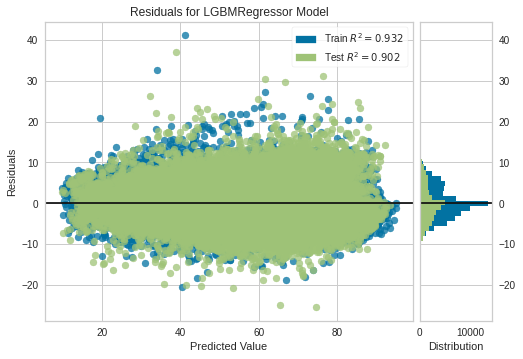

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm)

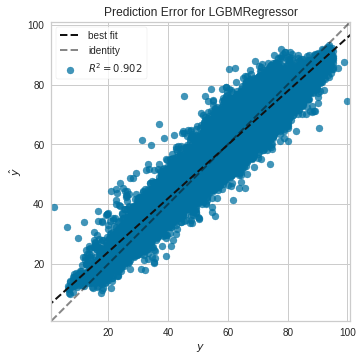

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='error')

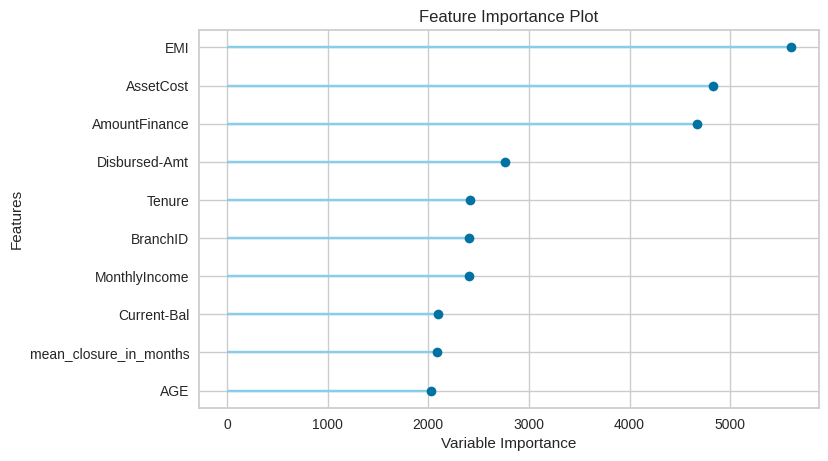

INFO:logs:Visual Rendered Successfully
INFO:logs:plot_model() succesfully completed......................................


In [ ]:
plot_model(tuned_lightgbm, plot='feature')

In [ ]:
evaluate_model(tuned_lightgbm)

INFO:logs:Initializing evaluate_model()
INFO:logs:evaluate_model(estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=71, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=230, n_jobs=-1, num_leaves=200, objective=None,
              random_state=5317, reg_alpha=1e-07, reg_lambda=0.4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), fold=None, fit_kwargs=None, plot_kwargs=None, feature_name=None, groups=None, use_train_data=False)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [ ]:
predict_model(tuned_lightgbm)

INFO:logs:Initializing predict_model()
INFO:logs:predict_model(estimator=LGBMRegressor(bagging_fraction=0.8, bagging_freq=1, boosting_type='gbdt',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.7,
              importance_type='split', learning_rate=0.05, max_depth=-1,
              min_child_samples=71, min_child_weight=0.001, min_split_gain=0.3,
              n_estimators=230, n_jobs=-1, num_leaves=200, objective=None,
              random_state=5317, reg_alpha=1e-07, reg_lambda=0.4, silent='warn',
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0), probability_threshold=None, encoded_labels=True, drift_report=False, raw_score=False, round=4, verbose=True, ml_usecase=MLUsecase.REGRESSION, display=None, drift_kwargs=None)
INFO:logs:Checking exceptions
INFO:logs:Preloading libraries
INFO:logs:Preparing display monitor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,3.7722,23.7561,4.874,0.9018,0.0944,0.0718


,BranchID,Tenure,AssetCost,AmountFinance,EMI,AGE,MonthlyIncome,LTFS-Tradelines,Primary-Applicants,Closed-Accounts,...,year_reported_2013,year_reported_2014,year_reported_2015,year_reported_2016,year_reported_2017,year_reported_2018,year_reported_2019,year_reported_2020,LTV,Label
0,-1.320834,-0.269157,0.257829,-0.499900,-0.806455,-0.488155,-0.277055,-0.582965,-0.617145,-0.380357,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,50.490002,46.444114
1,-1.225429,-0.024308,0.717425,0.729495,0.911486,-1.684526,0.694432,0.721836,0.652418,0.354809,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,66.930000,59.157180
2,-0.991253,-0.758855,-0.116737,0.493073,2.323314,-0.146335,0.588836,2.026637,1.921981,2.070195,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,51.009998,60.956091
3,1.393872,-0.024308,0.853430,0.965917,-0.353462,-0.231790,0.272047,-0.023764,-0.073047,-0.625412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,69.230003,64.824999
4,-0.080569,0.710238,-1.830397,-0.452616,-0.216192,-0.573610,-0.363643,-0.582965,0.289686,0.844919,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,84.750000,78.718802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34394,1.576009,0.710238,0.853430,1.533330,0.727544,-0.573610,-0.255935,-0.582965,-0.617145,-0.380357,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,78.459999,71.856104
34395,-0.765751,0.710238,0.400081,0.609525,0.261476,-1.171796,-0.092367,-0.582965,-0.617145,-0.625412,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,68.720001,63.792643
34396,-0.314745,0.710238,-1.141306,-0.263478,-1.787940,0.451850,-0.410106,-0.210165,-0.073047,-0.135302,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,73.669998,72.780807
34397,-1.182063,-0.269157,1.034769,1.455727,1.829140,-1.086341,0.051350,-0.396565,-0.435779,-0.625412,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,58.689999,65.958455
